In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
train_array = np.genfromtxt("A2Q2Data_train.csv", delimiter=",")
test_array = np.genfromtxt("A2Q2Data_test.csv", delimiter=",")

# a = np.array([[1,2,3],[4,5,6]])
# b = a[:,:1]
# print(b)

x_train = train_array[:,:100]
y_train = train_array[:,100:]

x_test = test_array[:,:100]
y_test = test_array[:,100:]

print(x_train.shape)
print(y_train.shape)

(500, 100)
(500, 1)


In [11]:
# x_train = np.array([[1,2],[3,2]])
# y_train = np.array([1,2])
#W = np.zeros(100)
W = np.zeros(100)
train_size = 500
x_cur = x_train[:100,:]
y_cur = y_train[:100,:]

print(x_cur.shape)
print(y_cur.shape)
xtx = x_cur.T.dot(x_cur)
xtx_inv = np.linalg.inv(xtx) 
xty = x_cur.T.dot(y_cur)
# print(xtx)
# print(xtx_inv)
# print(xty)

W_ml = (xtx_inv).dot(xty)
W_ml = W_ml.flatten()
# print(W_ml)

# print(W.shape)
# print(xtx.shape)
# print(xty.shape)
# print(xtx_inv.shape)
# print(W.shape)
# print(xty.shape)

cur_W = np.array([])
for i in W:
    cur_W = np.append(cur_W,i)
    
# print(xty.shape)
# print(xtx_inv.dot(cur_W))
# print(xty.flatten())
# print(xtx_inv.dot(cur_W) - xty.flatten())
# print(cur_W)
    
lse = np.array([])
itr = np.array([])
for t in range(1200):
    x_cur = x_train[((t%5)*100):((t%5)*100)+100,:]
    y_cur = y_train[((t%5)*100):((t%5)*100)+100,:]
    
    xtx = x_cur.T.dot(x_cur)
    xtx_inv = np.linalg.inv(xtx) 
    xty = x_cur.T.dot(y_cur)
    
    W_ml = (xtx_inv).dot(xty)
    W_ml = W_ml.flatten()
    
    delta_W = xtx_inv.dot(cur_W) - xty.flatten()#(dX1) vector -> delta_W
    #flatten() -> convert 2d -> 1d
    cur_W = cur_W - (0.00001)*(delta_W)#(dX1) vector -> cur_W
    lse = np.append(lse,np.linalg.norm(cur_W-W_ml))
    itr = np.append(itr,t)
    #print(np.linalg.norm(cur_W-W_ml))
# print(delta_W)
# print(cur_W)
# print(lse)
# print(itr)


(100, 100)
(100, 1)


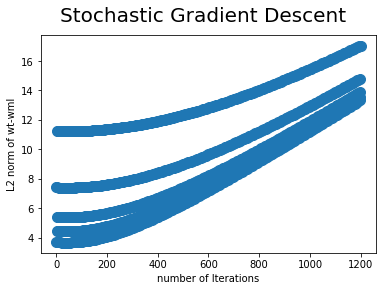

In [13]:
plt.suptitle('Stochastic Gradient Descent', fontsize=20)
plt.ylabel("L2 norm of wt-wml")
plt.xlabel("number of Iterations")
plt.scatter(itr[:], lse[:], s=100)
plt.show()